In [ ]:
#import dependencies
import pandas as pd
import glob

# Data Preprocessing

In [ ]:
path = r'TrainingData' # use your path to training data files to import
all_x_files = glob.glob(path + "/subject_00*_*__x.csv")
all_x_time_files = glob.glob(path + "/subject_00*_*__x_time.csv")
all_y_files = glob.glob(path + "/subject_00*_*__y.csv")
all_y_time_files = glob.glob(path + "/subject_00*_*__y_time.csv")
li = []

print(sorted(all_x_files))
print("\n")
print(sorted(all_x_time_files))
print("\n")
print(sorted(all_y_files))
print("\n")
print(sorted(all_y_time_files))

['TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_02__x.csv', 'TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_04__x.csv', 'TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_06__x.csv', 'TrainingData/subject_001_07__x.csv', 'TrainingData/subject_001_08__x.csv', 'TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_02__x.csv', 'TrainingData/subject_002_03__x.csv', 'TrainingData/subject_002_04__x.csv', 'TrainingData/subject_002_05__x.csv', 'TrainingData/subject_003_01__x.csv', 'TrainingData/subject_003_02__x.csv', 'TrainingData/subject_003_03__x.csv', 'TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_02__x.csv', 'TrainingData/subject_005_01__x.csv', 'TrainingData/subject_005_02__x.csv', 'TrainingData/subject_005_03__x.csv', 'TrainingData/subject_006_01__x.csv', 'TrainingData/subject_006_02__x.csv', 'TrainingData/subject_006_03__x.csv', 'TrainingData/subject_007_01__x.csv', 'TrainingData/subject_007_02__x.csv', 'TrainingDa

In [ ]:
gen_files=[]
for filename in sorted(all_x_files):
    gen= filename[:-7]
    #print(filename,gen)
    gen_files.append(gen)

print(gen_files)
subject_list=[]
for filename in gen_files:
    file=filename.split('/')[1]
    print(file) 
    subject_list.append(file)

['TrainingData/subject_001_01', 'TrainingData/subject_001_02', 'TrainingData/subject_001_03', 'TrainingData/subject_001_04', 'TrainingData/subject_001_05', 'TrainingData/subject_001_06', 'TrainingData/subject_001_07', 'TrainingData/subject_001_08', 'TrainingData/subject_002_01', 'TrainingData/subject_002_02', 'TrainingData/subject_002_03', 'TrainingData/subject_002_04', 'TrainingData/subject_002_05', 'TrainingData/subject_003_01', 'TrainingData/subject_003_02', 'TrainingData/subject_003_03', 'TrainingData/subject_004_01', 'TrainingData/subject_004_02', 'TrainingData/subject_005_01', 'TrainingData/subject_005_02', 'TrainingData/subject_005_03', 'TrainingData/subject_006_01', 'TrainingData/subject_006_02', 'TrainingData/subject_006_03', 'TrainingData/subject_007_01', 'TrainingData/subject_007_02', 'TrainingData/subject_007_03', 'TrainingData/subject_007_04', 'TrainingData/subject_008_01']
subject_001_01
subject_001_02
subject_001_03
subject_001_04
subject_001_05
subject_001_06
subject_00

In [ ]:
subject_list

['subject_001_01',
 'subject_001_02',
 'subject_001_03',
 'subject_001_04',
 'subject_001_05',
 'subject_001_06',
 'subject_001_07',
 'subject_001_08',
 'subject_002_01',
 'subject_002_02',
 'subject_002_03',
 'subject_002_04',
 'subject_002_05',
 'subject_003_01',
 'subject_003_02',
 'subject_003_03',
 'subject_004_01',
 'subject_004_02',
 'subject_005_01',
 'subject_005_02',
 'subject_005_03',
 'subject_006_01',
 'subject_006_02',
 'subject_006_03',
 'subject_007_01',
 'subject_007_02',
 'subject_007_03',
 'subject_007_04',
 'subject_008_01']

## Making individual subject data files

Merge the x_meas and x_time file based on the time value
Merge the y_time and y_label file based on the time value

In [ ]:
#Creating x meas and time csv and y label and time csv
for filename in gen_files:
    subject=filename.split('/')[1]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    #df1['time']=df1['time'].apply(lambda x:format{x,".2f"})
    df1['time']=df1['time'].astype(str)
    #df1['time'] = df1['time'].astype(str).str.encode('utf-8')
    df3=pd.read_csv(filename+'__y.csv', names =['label'])
    df4=pd.read_csv(filename+'__y_time.csv', names =['time'])
    df3['time']=df4['time']
    df3['time']=df3['time'].astype(str)
    #df3['time'] = df3['time'].astype(str).str.encode('utf-8')
    df1.to_csv('ProcessData/'+subject+'x_meas_time.csv',index=False)
    df3.to_csv('ProcessData/'+subject+'y_label_time.csv',index=False)

## Join x and y data on each subject and then interpolate the labels

Merge the x and y_data files.
After merging, we will observe that only 1/4th of total dataset is labelled. hence, we use interplolation technique to fill the other labels. 

In [ ]:
#Creating each subject final csv and interpolate the data 
for subject in subject_list:
    df1 = pd.read_csv('ProcessData/'+subject+'x_meas_time.csv')
    df2 = pd.read_csv('ProcessData/'+subject+'y_label_time.csv')
    df3 = pd.merge(df1, df2, on='time', how='outer')
    #print(df3)
    df3.to_csv('Subject/'+subject+'final.csv',index=False)
    df3['label']=df3['label'].interpolate(method='pad')
    df4 = df3.loc[df3['time']!=0]
    df4.to_csv('Interpolated/'+subject+'_interpolated.csv',index=False)

In [ ]:
#checking the shape of the csv created
df3 = pd.read_csv('TrainingData/subject_001_01__x_time.csv')
df4 = pd.read_csv('TrainingData/subject_001_01__x.csv')
df5 = pd.read_csv('TrainingData/subject_001_01__y_time.csv')
df6 = pd.read_csv('TrainingData/subject_001_01__y.csv')
print(df3.shape, df4.shape, df5.shape, df6.shape)
df1 = pd.read_csv('ProcessData/subject_001_01x_meas_time.csv')
df2 = pd.read_csv('ProcessData/subject_001_01y_label_time.csv')
print(df1.shape)
print(df2.shape)
df3=pd.read_csv('Subject/subject_001_01final.csv')
print(df3.shape)
df3=pd.read_csv('Interpolated/subject_001_01_interpolated.csv')
print(df3.shape)

(37889, 1) (37889, 6) (9472, 1) (9472, 1)
(37890, 7)
(9473, 2)
(37890, 8)
(37889, 8)


## Merge all individual subject interpolated csv files to single file

The interpolated_combined.csv file will be our master file for training and validation.

In [ ]:
li=[]
path = r'Interpolated' # use your path
all_files = glob.glob(path + "/*.csv")
for files in sorted(all_files):
    print(files)
    df = pd.read_csv(files, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
    li.append(df)
    
df1 = pd.concat(li, axis=0, ignore_index=True)
df2 = df1.loc[df1['acc_x']!='acc_x']
print(df1)
df2.to_csv('Interpolated_combined.csv',index=False)

Interpolated/subject_001_01_interpolated.csv
Interpolated/subject_001_02_interpolated.csv


/Users/himanshugupta/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Interpolated/subject_001_03_interpolated.csv
Interpolated/subject_001_04_interpolated.csv
Interpolated/subject_001_05_interpolated.csv
Interpolated/subject_001_06_interpolated.csv
Interpolated/subject_001_07_interpolated.csv
Interpolated/subject_001_08_interpolated.csv
Interpolated/subject_002_01_interpolated.csv
Interpolated/subject_002_02_interpolated.csv
Interpolated/subject_002_03_interpolated.csv
Interpolated/subject_002_04_interpolated.csv
Interpolated/subject_002_05_interpolated.csv
Interpolated/subject_003_01_interpolated.csv
Interpolated/subject_003_02_interpolated.csv
Interpolated/subject_003_03_interpolated.csv
Interpolated/subject_004_01_interpolated.csv
Interpolated/subject_004_02_interpolated.csv
Interpolated/subject_005_01_interpolated.csv
Interpolated/subject_005_02_interpolated.csv
Interpolated/subject_005_03_interpolated.csv
Interpolated/subject_006_01_interpolated.csv
Interpolated/subject_006_02_interpolated.csv
Interpolated/subject_006_03_interpolated.csv
Interpolat

In [ ]:
# Checking the data imbalance
df=pd.read_csv('Interpolated/subject_001_01_interpolated.csv')
walking = df[df.label==0].count()[0]
downstairs = df[df.label==1].count()[0]
upstairs = df[df.label==2].count()[0]
grass = df[df.label==3].count()[0]
print(walking, downstairs,upstairs, grass)

25773 2844 3152 6120


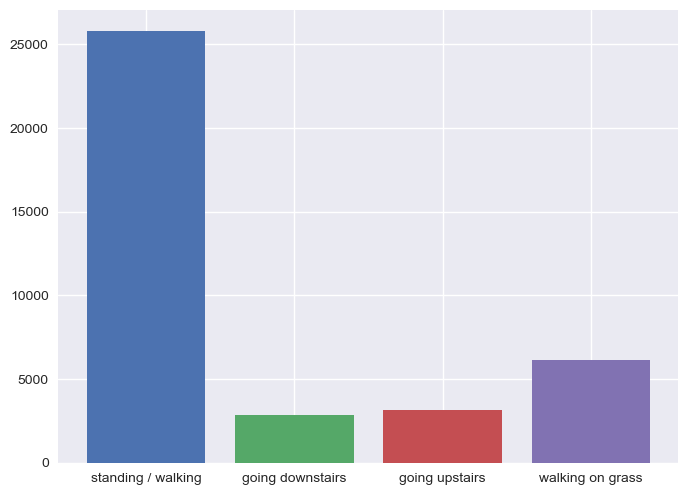

In [ ]:
# The data imbalance graph for subject 1
import matplotlib.pyplot as plt

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking, downstairs,upstairs, grass]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar])

1006897 55216 73068 206436


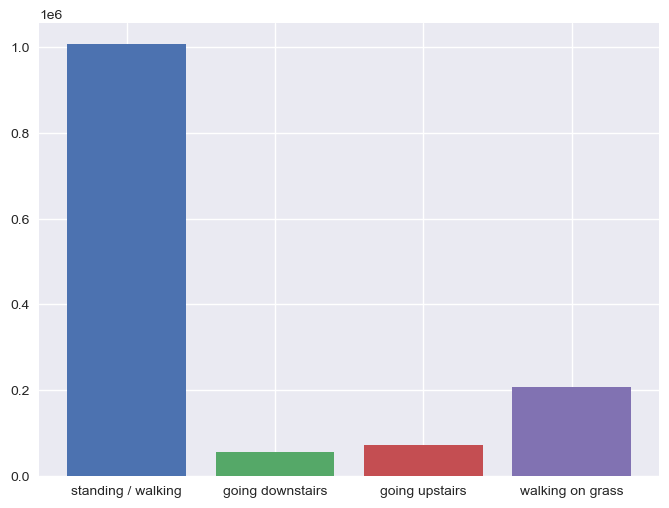

In [ ]:
# The data imbalance graph for entire dataset consisting of all subjects
df=pd.read_csv('Interpolated_combined.csv')
walking_full = df[df.label==0].count()[0]
downstairs_full = df[df.label==1].count()[0]
upstairs_full = df[df.label==2].count()[0]
grass_full = df[df.label==3].count()[0]
print(walking_full, downstairs_full,upstairs_full, grass_full)

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking_full, downstairs_full,upstairs_full, grass_full]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar])

In [ ]:
y_train = df.label
x_train= df.drop('label', axis=1)
print(y_train)
print("\n~~~~~~~")
print(x_train)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1341612    0.0
1341613    0.0
1341614    0.0
1341615    0.0
1341616    0.0
Name: label, Length: 1341617, dtype: float64

~~~~~~~
            acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z     time
0        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345     0.02
1        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159     0.05
2        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223     0.07
3        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111     0.10
4        4.226515  8.273807  2.851742  0.012534  0.000445 -0.016830     0.12
...           ...       ...       ...       ...       ...       ...      ...
1341612  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031  1203.32
1341613  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000  1203.34
1341614  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042  1203.37
1341615  2.

In [ ]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/himanshugupta/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                          

## Using SMOTE to balance the minority classes (1.0, 2.0, 3.0)

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter


In [ ]:
county = Counter(y_train)
print(county)

Counter({0.0: 1006897, 3.0: 206436, 2.0: 73068, 1.0: 55216})


In [ ]:
sm = SMOTE(random_state=23)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(len(x_train_sm), len(y_train_sm))

county_sm = Counter(y_train_sm)
print(county_sm)

4027588 4027588
Counter({0.0: 1006897, 1.0: 1006897, 2.0: 1006897, 3.0: 1006897})


## Split into training and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_sm, y_train_sm, test_size=0.2,random_state=123)

In [ ]:
print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

3222070 3222070
805518 805518


## Random Forest

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier

Random_F_model = RandomForestClassifier(n_estimators=20, random_state=0)
Random_F_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
import pickle

saved_model_RF = 'RF_model_smote.sav'
pickle.dump(Random_F_model, open(saved_model_RF, 'wb'))

In [ ]:
y_pred = Random_F_model.predict(x_val)


In [ ]:
#print(type(y_pred))
#print (type(y_val))
print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

F1 Score: 0.9097797768751095
Accuracy Score: 0.9108052209882337
Precision score:  0.9099234360466042
Recall score:  0.9107539838492922
Accuracy Score: 0.9108052209882337
Confusion Matrix: [[161095   7381   6098  26607]
 [  3229 195674   1023   1360]
 [  2317    783 197676    951]
 [ 17306   2417   2376 179225]]
Mean Absolute Error: 0.2133608435813973
Mean Squared Error: 0.5707234351063539
Root Mean Squared Error: 0.7554623982081133


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=10)
KNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
import pickle

saved_model_KNN = 'KNN_smote.sav'
pickle.dump(KNN_Classifier, open(saved_model_KNN, 'wb'))

In [ ]:
y_pred_KNN = KNN_Classifier.predict(x_val)
print('F1 score: ', metrics.f1_score(y_val, y_pred_KNN, average='macro'))

F1 score:  0.8787054499267164


In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_KNN, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_KNN))
print('Precision score: ', metrics.precision_score(y_val, y_pred_KNN, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_KNN, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_KNN))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_KNN))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_KNN))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_KNN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_KNN)))

F1 Score: 0.8787054499267164
Accuracy Score: 0.8847909047345931
Precision score:  0.8888437453974138
Recall score:  0.884697604791054
Accuracy Score: 0.8847909047345931
Confusion Matrix: [[128531  17204  12804  42642]
 [   412 200167    270    437]
 [   381    434 200579    333]
 [ 10128   4175   3583 183438]]
Mean Absolute Error: 0.2683242335987526
Mean Squared Error: 0.7055757909817036
Root Mean Squared Error: 0.8399855897464573


## Random Forest with estimator 40

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier

Random_F_model_40 = RandomForestClassifier(n_estimators=40, random_state=0)
Random_F_model_40.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [ ]:
x_test_009 = pd.read_csv('TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('TestProcessData/subject_012_01final_inner.csv')

y_pred_RF_009 = Random_F_model_40.predict(x_test_009)
y_pred_RF_010 = Random_F_model_40.predict(x_test_010)
y_pred_RF_011 = Random_F_model_40.predict(x_test_011)
y_pred_RF_012 = Random_F_model_40.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF40/subject_009_01__y_prediction.csv", y_pred_RF_009, delimiter=",")
np.savetxt("TestResults/RF40/subject_010_01__y_prediction.csv", y_pred_RF_010, delimiter=",")
np.savetxt("TestResults/RF40/subject_011_01__y_prediction.csv", y_pred_RF_011, delimiter=",")
np.savetxt("TestResults/RF40/subject_012_01__y_prediction.csv", y_pred_RF_012, delimiter=",")

In [ ]:
y_pred_RF40 = Random_F_model_40.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF40, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF40))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF40, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF40, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF40))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF40))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF40))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF40))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF40)))

F1 Score: 0.915856516937698
Accuracy Score: 0.9169279891945308
Precision score:  0.9164699744704151
Recall score:  0.9168777622074374
Accuracy Score: 0.9169279891945308
Confusion Matrix: [[161565   7205   6074  26337]
 [  2723 196315    986   1262]
 [  1943    658 198177    949]
 [ 14475   2154   2150 182545]]
Mean Absolute Error: 0.19859643111637482
Mean Squared Error: 0.5309763406900901
Root Mean Squared Error: 0.7286812339357246


## Random Forest with estimator 60

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier

Random_F_model_60 = RandomForestClassifier(n_estimators=60, random_state=0)
Random_F_model_60.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [ ]:
x_test_009 = pd.read_csv('TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('TestProcessData/subject_012_01final_inner.csv')

y_pred_RF60_009 = Random_F_model_60.predict(x_test_009)
y_pred_RF60_010 = Random_F_model_60.predict(x_test_010)
y_pred_RF60_011 = Random_F_model_60.predict(x_test_011)
y_pred_RF60_012 = Random_F_model_60.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF60/subject_009_01__y_prediction.csv", y_pred_RF60_009, delimiter=",")
np.savetxt("TestResults/RF60/subject_010_01__y_prediction.csv", y_pred_RF60_010, delimiter=",")
np.savetxt("TestResults/RF60/subject_011_01__y_prediction.csv", y_pred_RF60_011, delimiter=",")
np.savetxt("TestResults/RF60/subject_012_01__y_prediction.csv", y_pred_RF60_012, delimiter=",")

In [ ]:
y_pred_RF60 = Random_F_model_60.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF60, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF60))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF60, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF60, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF60))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF60))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF60))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF60))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF60)))

F1 Score: 0.9181688554609746
Accuracy Score: 0.9192494767342256
Precision score:  0.9189303249886663
Recall score:  0.9191997639831198
Accuracy Score: 0.9192494767342256
Confusion Matrix: [[161905   7143   6082  26051]
 [  2551 196562    948   1225]
 [  1860    610 198372    885]
 [ 13539   2047   2105 183633]]
Mean Absolute Error: 0.1929689963476918
Mean Squared Error: 0.5157029389783965
Root Mean Squared Error: 0.7181245985052988


## Random forest with estimator 100

In [ ]:
## Random Forest with estimator 100 
from sklearn.ensemble import RandomForestClassifier

Random_F_model_100 = RandomForestClassifier(n_estimators=100, random_state=0)
Random_F_model_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_RF100 = Random_F_model_100.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF100, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF100))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF100, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF100, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF100))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF100))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF100)))

F1 Score: 0.9189096865720365
Accuracy Score: 0.9200104777298583
Precision score:  0.919829672079975
Recall score:  0.9199607377639372
Accuracy Score: 0.9200104777298583
Confusion Matrix: [[161759   7136   6092  26194]
 [  2435 196651    970   1230]
 [  1767    607 198424    929]
 [ 12959   2009   2105 184251]]
Mean Absolute Error: 0.19097897253692656
Mean Squared Error: 0.5101698534359257
Root Mean Squared Error: 0.7142617541461433


In [ ]:
x_test_009 = pd.read_csv('TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('TestProcessData/subject_012_01final_inner.csv')

y_pred_RF100_009 = Random_F_model_100.predict(x_test_009)
y_pred_RF100_010 = Random_F_model_100.predict(x_test_010)
y_pred_RF100_011 = Random_F_model_100.predict(x_test_011)
y_pred_RF100_012 = Random_F_model_100.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF100/subject_009_01__y_prediction.csv", y_pred_RF100_009, delimiter=",")
np.savetxt("TestResults/RF100/subject_010_01__y_prediction.csv", y_pred_RF100_010, delimiter=",")
np.savetxt("TestResults/RF100/subject_011_01__y_prediction.csv", y_pred_RF100_011, delimiter=",")
np.savetxt("TestResults/RF100/subject_012_01__y_prediction.csv", y_pred_RF100_012, delimiter=",")

## XGBoost 

In [ ]:
from xgboost import XGBClassifier

# fit model on training data
XGB_model = XGBClassifier(learning_rate=0.1, n_estimators=20)
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
import pickle

saved_model_XGB = 'XGB_smote.sav'
pickle.dump(XGB_model, open(saved_model_XGB, 'wb'))

In [ ]:
x_test_009 = pd.read_csv('TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('TestProcessData/subject_012_01final_inner.csv')

y_pred_XG_009 = XGB_model.predict(x_test_009)
y_pred_XG_010 = XGB_model.predict(x_test_010)
y_pred_XG_011 = XGB_model.predict(x_test_011)
y_pred_XG_012 = XGB_model.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/XGB/subject_009_01__y_prediction.csv", y_pred_XG_009, delimiter=",")
np.savetxt("TestResults/XGB/subject_010_01__y_prediction.csv", y_pred_XG_010, delimiter=",")
np.savetxt("TestResults/XGB/subject_011_01__y_prediction.csv", y_pred_XG_011, delimiter=",")
np.savetxt("TestResults/XGB/subject_012_01__y_prediction.csv", y_pred_XG_012, delimiter=",")

In [ ]:
y_pred_XGB = XGB_model.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_XGB, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_XGB))
print('Precision score: ', metrics.precision_score(y_val, y_pred_XGB, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_XGB, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_XGB))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_XGB))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_XGB))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_XGB))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_XGB)))

F1 Score: 0.6286275721015606
Accuracy Score: 0.6345494452017211
Precision score:  0.6342074393716188
Recall score:  0.6344190196590909
Accuracy Score: 0.6345494452017211
Confusion Matrix: [[ 82065  26486  23596  69034]
 [ 14068 136467  19671  31080]
 [  8829  10996 165184  16718]
 [ 37554  17952  18393 127425]]
Mean Absolute Error: 0.7312189175164304
Mean Squared Error: 1.7274002567292104
Root Mean Squared Error: 1.3143059981333154
